# Maximum Likelihood Estimation (MLE) by Example

## Outine
- Introduction to Maximum Likelihood Estimation (MLE)
- Setup
- Modeling Ordinary Least Squares (OLS) with Statsmodels
- Calculating OLS using MLE methods
- Wrap up

  
## Introduction to Maximum Likelihood Estimation

Maximum likelihood estimation (MLE) is a technique used for estimating the parameters of a given distribution, using some observed data. For example, if a population is known to follow a normal distribution but the mean and variance are unknown, MLE can be used to estimate them using a limited sample of the population, by finding particular values of the mean and variance so that the observation is the most likely result to have occurred.

Maximum Likelihood Estimation is a probabilistic framework for solving the problem of density estimation. It involves maximizing a likelihood function in order to find the probability distribution and parameters that best explain the observed data.

<img src="images/mle_example.gif" width="400">


## Setup

Implementing MLE can be quite simple, with a variety of approaches. 

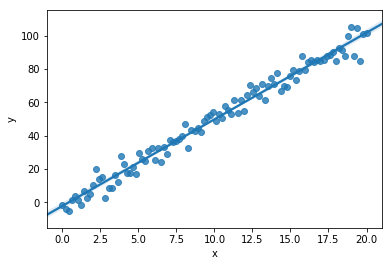

In [46]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
#import pymc3 as pm3
#import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline


# generate data
N = 100
x = np.linspace(0,20,N)
rv = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 5*x + rv
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

# plot
sns.regplot(df.x, df.y);

## Modeling Ordinary Least Squares (OLS) with Statsmodels

Since we created regression-like, continuous data, we will use sm.OLS to calculate the best coefficients and Log-likelihood (LL) as a benchmark.

In [47]:
# split features and target
X = df[['constant', 'x']]
# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4477.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           1.32e-83
Time:                        21:40:24   Log-Likelihood:                -291.97
No. Observations:                 100   AIC:                             587.9
Df Residuals:                      98   BIC:                             593.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -2.1600      0.899     -2.402      0.018      -3.945      -0.375
x              5.1985      0.078     66.913      0.000       5.044       5.353
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.855
Skew:                          -0.264   Prob(JB):                        0.395
Kurtosis:                       3.409   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice constant is close to zero, and beta for feature x is close to 5, per our equation.

## Calculating OLS using MLE methods

Because scipy.optimize has only a minimize method, we'll minimize the negative of the log-likelihood. 

We can build a simple function that does everything in one pass for regression outputs:

In [48]:
# define likelihood function
def MLERegression(params):
 intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
 yhat = intercept + beta*x # predictions
# next, we flip the Bayesian question
# compute PDF of observed values normally distributed around mean (yhat)
# with a standard deviation of sd
 negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
# return negative LL
 return(negLL)

Now that we have a cost function, let’s initialize and minimize it:


In [49]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([6,6,3])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
 options={'disp': True})

Optimization terminated successfully.
         Current function value: 291.968157
         Iterations: 106
         Function evaluations: 188


Let’s check the results:


In [50]:
results # this gives us verbosity around our minimization
# notice our final key and associated values…


 final_simplex: (array([[-2.15989578,  5.19851482,  4.48501453],
       [-2.15996239,  5.19852267,  4.48499565],
       [-2.15995797,  5.19852418,  4.48503231],
       [-2.15999304,  5.19851782,  4.48502104]]), array([291.96815694, 291.96815694, 291.96815694, 291.96815695]))
           fun: 291.9681569394154
       message: 'Optimization terminated successfully.'
          nfev: 188
           nit: 106
        status: 0
       success: True
             x: array([-2.15989578,  5.19851482,  4.48501453])

In [51]:
# drop results into df and round to match statsmodels
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)
# do our numbers match the OLS model?

,coef
constant,-2.1599
x,5.1985


## Wrap up
We discussed:
- Introduction to Maximum Likelihood Estimation (MLE)
- Setup
- Modeling Ordinary Least Squares (OLS) with Statsmodels
- Calculating OLS using MLE methods